In [1]:
import pandas as pd
import os

print(os.getcwd())

C:\Users\admin\Documents\test\Untitled Folder


In [3]:
sample_1 = pd.read_excel(r"C:\Users\admin\Documents\test\Untitled Folder\data\sample_1.xlsx",
                       header =1,
                       skipfooter = 2,
                       engine = 'openpyxl',
                       usecols = 'A:C')
sample_1.head()

,국적코드,성별,입국객수
0,A01,남성,106320
1,A01,여성,191436
2,A31,남성,319
3,A31,여성,42
4,A18,남성,158912


In [4]:
sample_1.tail()

,국적코드,성별,입국객수
1,A01,여성,191436
2,A31,남성,319
3,A31,여성,42
4,A18,남성,158912
5,A18,여성,232943


In [5]:
sample_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   국적코드    6 non-null      object
 1   성별      6 non-null      object
 2   입국객수    6 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 272.0+ bytes


In [6]:
#기초 통계 보기 
sample_1.describe()

,입국객수
count,6.000000
mean,114995.333333
std,98105.752006
min,42.000000
25%,26819.250000
50%,132616.000000
75%,183305.000000
max,232943.000000


In [8]:
sample_1

,국적코드,성별,입국객수
0,A01,남성,106320
1,A01,여성,191436
2,A31,남성,319
3,A31,여성,42
4,A18,남성,158912
5,A18,여성,232943


In [9]:
#하나의 컬럼 값만 가져오기 
sample_1["입국객수"]

0    106320
1    191436
2       319
3        42
4    158912
5    232943
Name: 입국객수, dtype: int64

In [10]:
#여러 컬럼값들 가져오기
sample_1[["입국객수","성별"]]

,입국객수,성별
0,106320,남성
1,191436,여성
2,319,남성
3,42,여성
4,158912,남성
5,232943,여성


In [12]:
#컬럼 생성
sample_1["기준년월"] = '2019-11' #해당값으로 값이 들어감
sample_1

,국적코드,성별,입국객수,기준년월
0,A01,남성,106320,2019-11
1,A01,여성,191436,2019-11
2,A31,남성,319,2019-11
3,A31,여성,42,2019-11
4,A18,남성,158912,2019-11
5,A18,여성,232943,2019-11


In [13]:
#데이터 선택하기 로우 
sample_1.loc[1]

국적코드        A01
성별           여성
입국객수     191436
기준년월    2019-11
Name: 1, dtype: object

In [14]:
sample_1.loc[sample_1["성별"] == "남성"]

,국적코드,성별,입국객수,기준년월
0,A01,남성,106320,2019-11
2,A31,남성,319,2019-11
4,A18,남성,158912,2019-11


In [16]:
condition = (sample_1["성별"] == "남성")

sample_1[condition]

,국적코드,성별,입국객수,기준년월
0,A01,남성,106320,2019-11
2,A31,남성,319,2019-11
4,A18,남성,158912,2019-11


In [19]:
sample_1.loc[sample_1["입국객수"] >= 150000]

,국적코드,성별,입국객수,기준년월
1,A01,여성,191436,2019-11
4,A18,남성,158912,2019-11
5,A18,여성,232943,2019-11


In [20]:
sample_1.loc[(sample_1["성별"] == "남성") &
             (sample_1["입국객수"]>=15000)]

,국적코드,성별,입국객수,기준년월
0,A01,남성,106320,2019-11
4,A18,남성,158912,2019-11


In [28]:
#한 컬럼에 여러조건 필터링1
sample_1.loc[(sample_1["국적코드"] == 'A01')| (sample_1["국적코드"] == 'A18')]

,국적코드,성별,입국객수,기준년월
0,A01,남성,106320,2019-11
1,A01,여성,191436,2019-11
4,A18,남성,158912,2019-11
5,A18,여성,232943,2019-11


In [33]:
#한 컬럼에 여러조건 필터링2
sample_1[sample_1["국적코드"].isin(["A01"])]

,국적코드,성별,입국객수,기준년월
0,A01,남성,106320,2019-11
1,A01,여성,191436,2019-11


In [34]:
#데이터 통합하기  - pc. merge() : 병합 옆
code_master = pd.read_excel("./data/sample_codemaster.xlsx")
code_master

,국적코드,국적명
0,A01,일본
1,A02,대만
2,A03,홍콩
3,A18,중국
4,A19,이란
5,A22,우즈베키스탄
6,A23,카자흐스탄
7,A99,아시아 기타


In [35]:

sample_1_code = pd.merge(left = sample_1, 
                         right = code_master, 
                         how = 'left', 
                         left_on='국적코드', 
                         right_on = '국적코드')
sample_1_code

,국적코드,성별,입국객수,기준년월,국적명
0,A01,남성,106320,2019-11,일본
1,A01,여성,191436,2019-11,일본
2,A31,남성,319,2019-11,NaN
3,A31,여성,42,2019-11,NaN
4,A18,남성,158912,2019-11,중국
5,A18,여성,232943,2019-11,중국


In [58]:
#데이터 통합하기 위아래 - 아래에 붙일 데이터 만들기 

sample_2 = pd.read_excel("./data/sample_2.xlsx",
                        header = 1,
                        skipfooter = 2,
                        usecols = 'A:C')

sample_2["기준년월"] = '2019-11'
sample_2_code = pd.merge(left = sample_2, 
                         right = code_master, 
                         how='left', 
                         left_on="국적코드", 
                         right_on = "국적코드")
sample_2_code

,국적코드,성별,입국객수,기준년월,국적명
0,A01,남성,92556,2019-11,일본
1,A01,여성,163737,2019-11,일본
2,A18,남성,155540,2019-11,중국
3,A18,여성,249023,2019-11,중국


In [62]:
#만든 데이터들 위아래로 붙이기 
sample = sample_1_code.append(sample_2_code, ignore_index = True )
sample

,국적코드,성별,입국객수,기준년월,국적명
0,A01,남성,106320,2019-11,일본
1,A01,여성,191436,2019-11,일본
2,A31,남성,319,2019-11,NaN
3,A31,여성,42,2019-11,NaN
4,A18,남성,158912,2019-11,중국
5,A18,여성,232943,2019-11,중국
6,A01,남성,92556,2019-11,일본
7,A01,여성,163737,2019-11,일본
8,A18,남성,155540,2019-11,중국
9,A18,여성,249023,2019-11,중국


In [63]:
#데이터 저장
sample.to_excel('./data/sample_me.xlsx')

# 크롤링

In [117]:
from selenium import webdriver 
import os

크롬 드라이버를 다운받는다. 

In [118]:
driver = webdriver.Chrome(r"C:\Users\admin\Documents\chromedriver.exe")
print(os.getcwd())

<ipython-input-118-5ca8bc392bb7>:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(r"C:\Users\admin\Documents\chromedriver.exe")


C:\Users\admin\Documents\test\Untitled Folder


In [119]:
url = 'https://www.naver.com'
driver.get(url)

In [120]:
html = driver.page_source

'<html lang="ko" data-dark="false" data-useragent="Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.45 Safari/537.36"><head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"> <meta name="robots" content="index,nofollow"> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/ed
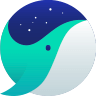
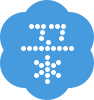

In [121]:
html

In [122]:
#뷰티풀솝을 이용한 정보찾기 -> 문자열 파싱
from bs4 import BeautifulSoup
soup = BeautifulSoup(html, 'html.parser')

In [123]:
tags_span = soup.select('span')
print(tags_span)

[<span>뉴스스탠드 바로가기</span>, <span>주제별캐스트 바로가기</span>, <span>타임스퀘어 바로가기</span>, <span>쇼핑캐스트 바로가기</span>, <span>로그인 바로가기</span>, <span class="blind">NAVER whale</span>, <span class="_1syGnXOL _3di88A4c" data-clk="dropbanner1b" style="
padding-right: 20px;
font-size: 18px;
color: #010101;
padding-left: 39px;
"><span>눈 건강 지킴이 </span><strong style="color: #008aff">웨일 다크 모드! </strong><span>지금 바로 사용해보세요</span></span>, <span>눈 건강 지킴이 </span>, <span>지금 바로 사용해보세요</span>, <span style="background-color: #1f97fd">다운로드</span>, <span class="blind">네이버</span>, <span class="blind">쥬니어네이버</span>, <span class="blind">해피빈</span>, <span class="blind">검색</span>, <span class="ico_search_submit"></span>, <span class="blind">한글 입력기</span>, <span class="ico_keyboard"></span>, <span class="blind">자동완성 레이어</span>, <span class="ico_arr"></span>, <span class="fix"><span class="common_ico_kwd"><i class="imsc ico_search"></i></span><span>@txt@</span></span>, <span class="common_ico_kwd"><i class="imsc ico_search"></i><

In [124]:
tags_p = soup.select('p')
tags_p 

[<p class="dsc">
 <i class="imsc ico_election"></i><span class="_alert_passage"></span>
 </p>,
 <p class="dsc">ON/OFF 설정은<br/>해당기기(브라우저)에 저장됩니다.</p>,
 <p class="dsc"><em class="txt">동일한 시간대/연령/남녀별</em> 사용자 그룹의<br/>관심사에 맞춰 자동완성을 제공합니다.</p>,
 <p class="popup_msg">해당 언론사 사정으로 접근이 제한됩니다.</p>,
 <p class="popup_msg"><strong class="NM_NEWSSTAND_POPUP_PNAME"></strong>을(를)<br/>구독해지 하시겠습니까?</p>,
 <p class="toast_msg">구독한 언론사에 추가되었습니다.</p>,
 <p class="popup_msg">해당 언론사 사정으로 접근이 제한됩니다.</p>,
 <p class="popup_msg"><strong class="NM_NEWSSTAND_POPUP_PNAME"></strong>을(를)<br/>구독해지 하시겠습니까?</p>,
 <p class="toast_msg">구독한 언론사에 추가되었습니다.</p>,
 <p class="popup_msg">해당 언론사 사정으로 접근이 일시 제한됩니다.</p>,
 <p class="popup_msg"><strong class="NM_NEWSSTAND_POPUP_PNAME"></strong>을(를)<br/>구독해지 하시겠습니까?</p>,
 <p class="popup_msg">해당 언론사 사정으로 접근이 제한됩니다.</p>,
 <p class="popup_msg"><strong class="NM_NEWSSTAND_POPUP_PNAME"></strong>을(를)<br/>구독해지 하시겠습니까?</p>,
 <p class="dsc_msg">언론사 구독 설정에서 관심있는 언론사를 구독하시면<br/>언론사가 직접 편집한 뉴스들을 네이

In [125]:
#span에 있는 class 이름이 name인 것 . name으로 찾으면 나오는게 없어서 나는 blind를 찾아봄
tags_name = soup.select('span.blind')
tags_name

[<span class="blind">NAVER whale</span>,
 <span class="blind">네이버</span>,
 <span class="blind">쥬니어네이버</span>,
 <span class="blind">해피빈</span>,
 <span class="blind">검색</span>,
 <span class="blind">한글 입력기</span>,
 <span class="blind">자동완성 레이어</span>,
 <span class="blind">쇼핑</span>,
 <span class="blind">쇼핑LIVE</span>,
 <span class="blind">리스트형</span>,
 <span class="blind">썸네일형</span>,
 <span class="blind">설정</span>,
 <span class="blind">이전</span>,
 <span class="blind">다음</span>,
 <span class="blind">닫기</span>,
 <span class="blind">닫기</span>,
 <span class="blind">이전</span>,
 <span class="blind">다음</span>,
 <span class="blind">닫기</span>,
 <span class="blind">닫기</span>,
 <span class="blind">이전</span>,
 <span class="blind">다음</span>,
 <span class="blind">다음</span>,
 <span class="blind">닫기</span>,
 <span class="blind">닫기</span>,
 <span class="blind">이전</span>,
 <span class="blind">다음</span>,
 <span class="blind">닫기</span>,
 <span class="blind">닫기</span>,
 <span class="blind">이전</span>,
 <span 

In [126]:
test = soup.select('div.list_theme_wrap > ul.list_theme > li.theme_item > a')

In [127]:
test

[<a class="theme_thumb" data-clk="tcc_hea.list1cont1" href="https://post.naver.com/viewer/postView.naver?volumeNo=32741612&amp;memberNo=11195360" target="_blank">
 <img alt="잘 때 만세 자세로 잔다면 ‘이 질환’ 조심!" height="114" loading="lazy" src="https://s.pstatic.net/dthumb.phinf/?src=%22https%3A%2F%2Fs.pstatic.net%2Fstatic%2Fwww%2Fmobile%2Fedit%2F20211125_1095%2Fupload_1637847316225fMwIF.jpg%22&amp;type=nf340_228" width="170"/>
 <span class="thumb_bd"></span>
 </a>,
 <a class="theme_info" data-clk="tcc_hea.list1cont1" href="https://post.naver.com/viewer/postView.naver?volumeNo=32741612&amp;memberNo=11195360" target="_blank">
 <em class="theme_category"> 건강</em>
 <strong class="title elss">잘 때 만세 자세로 잔다면 ‘이 질환’ 조심!</strong>
 <p class="desc">간혹 만세 자세를 해야지만 잠이 잘 온다는 분들이 있습니다. 만세 자세가 습관이 되어 잠이 들 때쯤 자신도 모르는 사이에 두 팔이 머리 위로 올라가기도 하는데요. 만세하고 자는 모습은 아기들에게서 흔히 볼 수 있습니다. 폐가 완전히 발달하지 않은 영유아의 경우, 만세 자세를 하면 횡격막이 올라가 숨 쉬기가 수월해지기 때문이죠. 하지만 성인이 되어서도 만세 </p>
 <div class="source_box">
 <span class="date">1주일 전</spa

# 멜론 노래순위 정보 가져오기

In [139]:
from selenium  import webdriver
from bs4 import BeautifulSoup

In [129]:
driver = webdriver.Chrome(r"C:\Users\admin\Documents\chromedriver.exe")
url = "https://www.melon.com/chart/index.htm"
driver.get(url)


<ipython-input-129-a0e33d7b5dd5>:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(r"C:\Users\admin\Documents\chromedriver.exe")


In [197]:
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

In [198]:
songs = soup.select('div.wrap_song_info')

In [199]:
#노래 제목
songs = soup.select('div.ellipsis.rank01 > span > a')

#가수 
singer = soup.select('div.ellipsis.rank02 > span > a ')

In [200]:
songs

[<a href="javascript:melon.play.playSong('1000002721',34298499);" title="리무진 (Feat. MINO) (Prod. GRAY) 재생">리무진 (Feat. MINO) (Prod. GRAY)</a>,
 <a href="javascript:melon.play.playSong('1000002721',34256568);" title="회전목마 (Feat. Zion.T, 원슈타인) (Prod. Slom) 재생">회전목마 (Feat. Zion.T, 원슈타인) (Prod. Slom)</a>,
 <a href="javascript:melon.play.playSong('1000002721',34298496);" title="만남은 쉽고 이별은 어려워 (Feat. Leellamarz) (Prod. TOIL) 재생">만남은 쉽고 이별은 어려워 (Feat. Leellamarz) (Prod. TOIL)</a>,
 <a href="javascript:melon.play.playSong('1000002721',34215822);" title="쉬어 (Feat. MINO) (Prod. GRAY) 재생">쉬어 (Feat. MINO) (Prod. GRAY)</a>,
 <a href="javascript:melon.play.playSong('1000002721',34215821);" title="Wake Up (Prod. 코드 쿤스트) 재생">Wake Up (Prod. 코드 쿤스트)</a>,
 <a href="javascript:melon.play.playSong('1000002721',34061322);" title="사랑은 늘 도망가 재생">사랑은 늘 도망가</a>,
 <a href="javascript:melon.play.playSong('1000002721',34101563);" title="strawberry moon 재생">strawberry moon</a>,
 <a href="javascript:melon.play.playSo

In [192]:
print(len(songs))

100


In [194]:
songs[0].get_text()

'리무진 (Feat. MINO) (Prod. GRAY)'

In [201]:

count = 0
for i in songs : 
    title = songs[count].get_text()
    name = singer[count].get_text()
    count +=1
    print(title,"|",name)

리무진 (Feat. MINO) (Prod. GRAY) | BE'O (비오)
회전목마 (Feat. Zion.T, 원슈타인) (Prod. Slom) | sokodomo
만남은 쉽고 이별은 어려워 (Feat. Leellamarz) (Prod. TOIL) | 베이식 (Basick)
쉬어 (Feat. MINO) (Prod. GRAY) | 아넌딜라이트(Anandelight)
Wake Up (Prod. 코드 쿤스트) | unofficialboyy
사랑은 늘 도망가 | BE'O (비오)
strawberry moon | 지구인
Savage | Mudd the student
다정히 내 이름을 부르면 | 개코
STAY | Ourealgoat (아우릴고트)
신호등 | SINCE
깐부 (Feat. 염따, ASH ISLAND) (Prod. TOIL) | 안병웅
Next Level | Tabber
너를 생각해 | 조광일
이제 나만 믿어요 | 임영웅
My Universe | 아이유
OHAYO MY NIGHT | aespa
Permission to Dance | 경서예지
Butter | 전건호
너와 나의 Memories | The Kid LAROI
Reset (Feat. 개코, Kid Milli) (Prod. 코드 쿤스트) | Justin Bieber
낙하 (with 아이유) | 이무진
그대라는 사치 | 쿤타
바라만 본다 | aespa
문득 | 주시크 (Joosiq)
TROUBLE (Prod. Slom) | 임영웅
별빛 같은 나의 사랑아 | Coldplay
다시 사랑한다면 (김필 Ver.) | 방탄소년단
Dynamite | 디핵 (D-Hack)
잊었니 | PATEKO (파테코)
HERO | 방탄소년단
Peaches (Feat. Daniel Caesar & Giveon) | 방탄소년단
Weekend | 염따
끝사랑 | TOIL
Bad Habits | 쿤타
헤픈 우연 | 베이식 (Basick)
Bk Love | 365LIT
고백 | 황지상
라일락 | 송민영
Celebrity | SINCE
밤하

In [193]:
from bs4 import BeautifulSoup
from urllib.request import urlopen

with urlopen('https://www.joongang.co.kr/') as response:
    soup = BeautifulSoup(response, 'html.parser')
    for anchor in soup.select("h2.headline"):
        print(anchor.get_text())


김제동 "저 싫어하죠?" 대놓고 묻자, 이준석의 반전 답변


쿨한 팝핀현준, 2억 수퍼카 박은 버스기사에 "괜찮아요 선생님"


김종국 심경고백 "아주 진절머리…이 나이에 적당히 운동할걸"


생방송 중 '자살' 당한 中왕훙…'영혼결혼' 노려 유골 도난까지


'하트얼굴' 아기 2kg 혹 떼줬다···韓의사 금식기도가 부른 기적


사설·칼럼


혁신창업의 길


법조 오피니언 허브, 로담(Law談)


헷갈리는 방역 A to Z


TODAY'S HOT

델타보다 센 최악의 변이'누' 벌써 남아공 덮쳤다
델타보다 센 최악의 변이'누' 벌써 남아공 덮쳤다




초기인선 세팅된 尹 선대위…핵심 요직 '강·법·사' 꿰찼다
초기인선 세팅된 尹 선대위…핵심 요직 '강·법·사' 꿰찼다




진중권 "안티페미 대표에 패전투수...尹지지율 다음달 역전될 듯"
진중권 "안티페미 대표에 패전투수...尹지지율 다음달 역전될 듯"



넷플릭스 영화로 돌아온 80년대 '책받침 미녀' 누구?
회원전용


[디지털스페셜] 네카라쿠배 성장의 비밀
회원전용


홍콩으로 진출하는 안성재 셰프의 모수 레스토랑
구독전용


'오래, 꾸준하다' 글로벌 1등 기업 고루 담은 이 펀드
회원전용



국민연금만으로 월 435만원 받는다, 해운대 부부 웃게한 비결




"저 싫어하죠" 대놓고 물은 김제동, 이준석의 반전 답변




"도쿄 한복판 월세 단돈 1000원" …이케아 3평 아파트 실험




"살인이 데이트 폭력이라는 이재명···TV로 사죄? 채널 돌렸다"




최윤길 前성남시의장 "대장동 의혹, 경찰 조사서 얘기하겠다"




팝핀현준, 2억 수퍼카 들이받은 버스기사에 "괜찮아요 선생님"




국정원 1차장에 盧정부 '외교 실세' 박선원…2차장 천세영




김어준 "日코로나 급감, 韓 키트 없어서 델타 못잡아내는 것"




15분마다 "몇시냐" 수능장 소란···수험생들 "1년 사라졌다" 분통




위중증 폭증에 정부 29일 방역대책 발표…비상계획 발동하나




화물연대 

# 유튜브 랭킹 데이터 수집 

In [202]:
from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd
import time


In [203]:
driver = webdriver.Chrome(r"C:\Users\admin\Documents\chromedriver.exe")
url = "https://youtube-rank.com/board/bbs/board.php?bo_table=youtube"
driver.get(url)

<ipython-input-203-e992cc8bcdea>:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(r"C:\Users\admin\Documents\chromedriver.exe")


In [277]:
html = driver.page_source
soup = BeautifulSoup(html,'html.parser')

categorys = soup.select('tr.aos-init > td.subject> h1 > p.category')

In [278]:
categorys[0].get_text().strip()
len(categorys)

100

In [279]:
channelName = soup.select('tr.aos-init > td.subject> h1 > a')
channelName

[<a href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=3203">
 								
 								BLACKPINK							</a>,
 <a href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=3204">
 								
 								HYBE LABELS							</a>,
 <a href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=5">
 								
 								BANGTANTV							</a>,
 <a href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=1164">
 								
 								SMTOWN							</a>,
 <a href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=88">
 								
 								Boram Tube Vlog [보람튜브 브이로그]							</a>,
 <a href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=12">
 								
 								1MILLION Dance Studio							</a>,
 <a href="https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&amp;wr_id=434">
 								
 								1theK (원더케이)							</a>,
 <a href="https://youtube-rank.com/board/bbs/board.php?bo_table=yo

In [280]:
channelName[0].get_text().strip()

'BLACKPINK'

In [281]:
subscribers = soup.select('td.subscriber_cnt')
subscribers[0].get_text().strip()

'6990만'

In [282]:
views = soup.select('td.view_cnt')
views[0].get_text().strip()

'212억7104만'

In [283]:
videos = soup.select('td.video_cnt')
videos[0].get_text().strip()

'395개'

In [286]:
count = len(categorys)
for i in range(0, count):
    title = channelName[i].get_text().strip()
    cate = categorys[i].get_text().strip()
    subscribe = subscriber[i].get_text().strip()
    view = views[i].get_text().strip()
    video =  videos[i].get_text().strip()
    print(title, cate, subscribe, view, video)
    
    

BLACKPINK [음악/댄스/가수] 6990만 212억7104만 395개
HYBE LABELS [음악/댄스/가수] 6280만 203억4643만 724개
BANGTANTV [음악/댄스/가수] 6100만 138억9953만 1,638개
SMTOWN [음악/댄스/가수] 2920만 229억1114만 3,773개
Boram Tube Vlog [보람튜브 브이로그] [키즈/어린이] 2650만 110억5288만 223개
1MILLION Dance Studio [음악/댄스/가수] 2450만 69억0724만 3,364개
1theK (원더케이) [음악/댄스/가수] 2370만 212억9651만 15,588개
JYP Entertainment [음악/댄스/가수] 2290만 148억6256만 1,422개
Mnet K-POP [음악/댄스/가수] 1890만 139억1365만 26,800개
JFlaMusic [음악/댄스/가수] 1730만 34억9425만 280개
KBS WORLD TV [TV/방송] 1720만 128억5427만 53,865개
Jane ASMR 제인 [음식/요리/레시피] 1550만 54억7111만 1,289개
officialpsy [음악/댄스/가수] 1530만 88억2297만 91개
AdeleVEVO [미분류] 1520만 103억9162만 48개
BIGBANG [음악/댄스/가수] 1390만 68억2145만 773개
TWICE [음악/댄스/가수] 1250만 26억2640만 687개
Saturday Night Live [미분류] 1240만 125억1290만 7,777개
Hongyu ASMR 홍유 [음식/요리/레시피] 1080만 30억9083만 417개
Nao FunFun [키즈/어린이] 1070만 443만 37개
Stone Music Entertainment [음악/댄스/가수] 1010만 82억0530만 8,288개
DuDuPopTOY [키즈/어린이] 1010만 45억1048만 1,897개
핑크퐁 (인기 동요・동화) [키즈/어린이] 988만 59억6976만 2,369개
MBCkpo

In [296]:
#이 전체 페이지가 더 있음 

result = []
for page in range(1, 11):
    url = 'https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page={page}'
    driver.get(url)
    time.sleep(2)
    html = driver.page_source
    soup = BeautifulSoup(html,'html.parser')
    length = len(soup.select('tr.aos-init > td.subject> h1 > p.category'))
    for i in range(0,length):
        title = channelName[i].get_text().strip()
        cate = categorys[i].get_text().strip()
        subscribe = subscriber[i].get_text().strip()
        view = views[i].get_text().strip()
        video =  videos[i].get_text().strip()
        data = [title, cate, subscribe, view, video]
        result.append(data)

In [298]:
result
print(len(result))

1000


In [299]:
df = pd.DataFrame(result)
df.coloums = ['title', 'category', 'subscriber', 'view', 'video']
df.to_excel('./data/youtube_rank.xlsx', index = False)

<ipython-input-299-4bf1589023ad>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.coloums = ['title', 'category', 'subscriber', 'view', 'video']


In [302]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
%matplotlib inline
import platform

if platform.system() == 'Windows':
    font_path = r"C:\Users\admin\AppData\Local\Microsoft\Windows\Fonts\나눔손글씨 가람연꽃.ttf"
    fontName = font_manager.FontProperties(fname=font_path).get_name()
    rc('font', family=fontName)

elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
else : 
    print('Check your OS system')






data = pd.read_excel('./data/youtube_rank.xlsx', )
data.head()

,0,1,2,3,4
0,BLACKPINK,[음악/댄스/가수],6990만,212억7104만,395개
1,HYBE LABELS,[음악/댄스/가수],6280만,203억4643만,724개
2,BANGTANTV,[음악/댄스/가수],6100만,138억9953만,"1,638개"
3,SMTOWN,[음악/댄스/가수],2920만,229억1114만,"3,773개"
4,Boram Tube Vlog [보람튜브 브이로그],[키즈/어린이],2650만,110억5288만,223개


In [303]:
#컬럼명 변경 
df.columns = ['title', 'category','subscriber','view','video']
df.head()

,title,category,subscriber,view,video
0,BLACKPINK,[음악/댄스/가수],6990만,212억7104만,395개
1,HYBE LABELS,[음악/댄스/가수],6280만,203억4643만,724개
2,BANGTANTV,[음악/댄스/가수],6100만,138억9953만,"1,638개"
3,SMTOWN,[음악/댄스/가수],2920만,229억1114만,"3,773개"
4,Boram Tube Vlog [보람튜브 브이로그],[키즈/어린이],2650만,110억5288만,223개
